In [1]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom

In [2]:
hypos = np.linspace(0, 1, 101)
pmf = Pmf(1, hypos)
data = 140, 250

In [3]:
def update_binomial(pmf, data):
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [4]:
update_binomial(pmf, data)

In [5]:
cumulative = pmf.cumsum()

In [6]:
from utils import decorate

In [7]:
def decorate_euro(title):
    decorate(xlabel='Proportion of head (x)',
             ylabel='Probability',
             title=title)

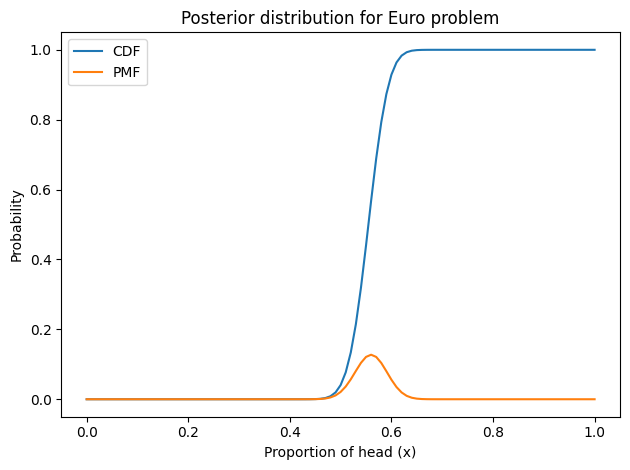

In [8]:
cumulative.plot(label='CDF')
pmf.plot(label='PMF')
decorate_euro(title='Posterior distribution for Euro problem')

In [9]:
cumulative[0.61]

np.float64(0.9638303193984253)

In [10]:
from scipy.interpolate import interp1d

In [11]:
ps = cumulative.values
qs = cumulative.index

interp = interp1d(ps, qs)
interp(0.96)

array(0.60890171)

In [12]:
# can also make cdf using pmf class :)
cdf = pmf.make_cdf()

In [13]:
cdf[0.61]

np.float64(0.9638303193984253)

In [14]:
try:
    cdf[0.615]
except Exception as e:
    print('error', e)
    cdf(0.615)

error 0.615


In [15]:
# can also go in the reverse direction, from probability to proportion
cdf.quantile(0.9638303)

array(0.61)

In [16]:
cdf.credible_interval(0.9)

array([0.51, 0.61])

One reason Cdf objects are useful is that they compute quantiles efficiently. Another is that they make it easy to compute the distribution of a maximum or minimum, as we’ll see in the next section.

7.2. Best Three of Four

In [17]:
from utils import make_die

In [18]:
die = make_die(6)
dice = [die] * 3

In [19]:
from utils import add_dist_seq
pmf_3d6 = add_dist_seq(dice)

In [20]:
def decorate_dice(title):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)

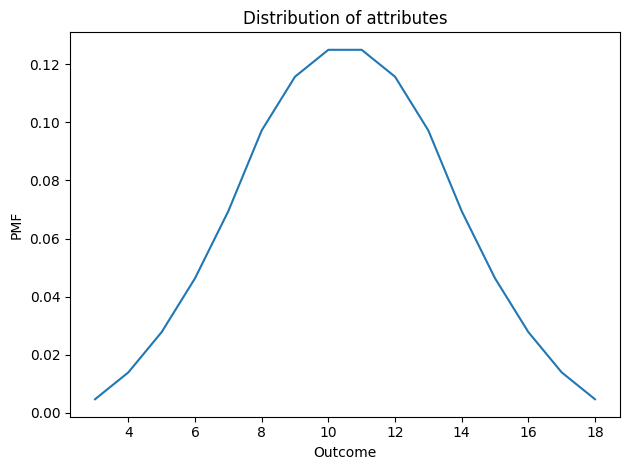

In [21]:
pmf_3d6.plot()
decorate_dice(title='Distribution of attributes')

If we roll four dice and add up the best three, computing the distribution of the sum is a bit more complicated. I’ll estimate the distribution by simulating 10,000 rolls.

In [22]:
n = 10_000
a = np.random.randint(1,7, size=(n, 4))

In [23]:
a.sort(axis=1)
t = a[:,1:].sum(axis=1)

In [24]:
pmf_best3 = Pmf.from_seq(t)

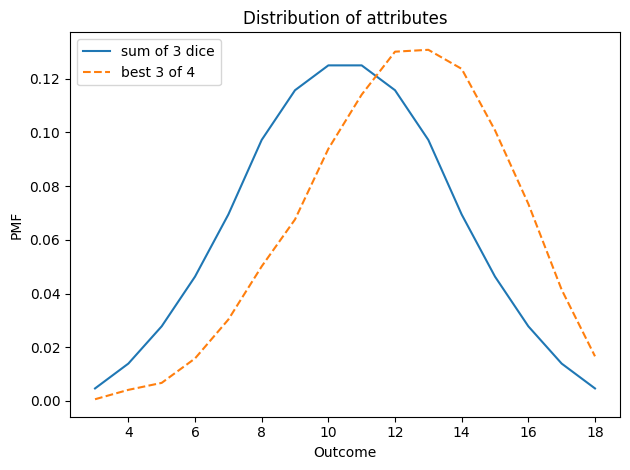

In [25]:
pmf_3d6.plot(label='sum of 3 dice')
pmf_best3.plot(label='best 3 of 4', ls='--')
decorate_dice('Distribution of attributes')

7.3. Maximum

In [26]:
cdf_best3 = pmf_best3.make_cdf()

In [28]:
# CDF(x) is the sum of probabilities for quantities less than or equal to x
# Another way, its the probability that a value selected will be less than or equal to x

# suppose we draw 6 values from this distribution. probability all of them are less than or equal to x

cdf_best3**6

3     4.665600e-20
4     1.077922e-14
5     2.194973e-12
6     4.049612e-10
7     3.614157e-08
8     1.551935e-06
9     2.892042e-05
10    3.797364e-04
11    3.166307e-03
12    1.829058e-02
13    7.140355e-02
14    2.048748e-01
15    4.294563e-01
16    6.987236e-01
17    9.044430e-01
18    1.000000e+00
Name: , dtype: float64

In [30]:
from empiricaldist import Cdf

cdf_max6 = Cdf(cdf_best3**6)

In [31]:
pmf_max6 = cdf_max6.make_pmf()

<Axes: >

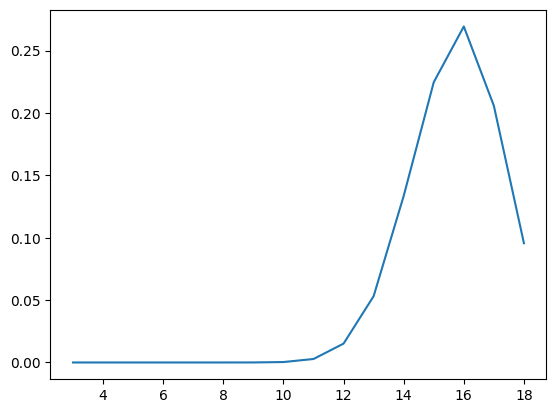

In [32]:
pmf_max6.plot(label='max of 6 attributes')

In [33]:
# can also produce via 
cdf_best3.max_dist(6)

,probs
3,4.665600e-20
4,1.077922e-14
5,2.194973e-12
6,4.049612e-10
7,3.614157e-08
8,1.551935e-06
9,2.892042e-05
10,3.797364e-04
11,3.166307e-03
12,1.829058e-02


7.4. Minimum

<Axes: >

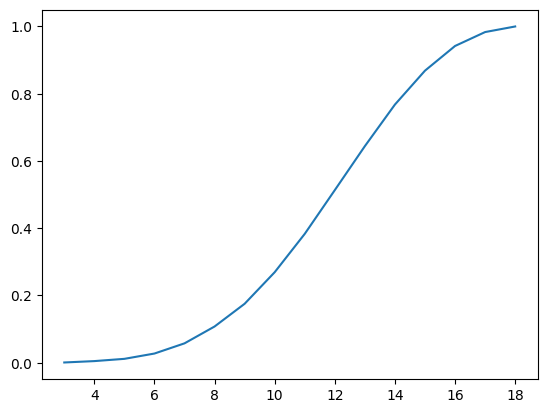

In [35]:
cdf_best3.plot()

In [36]:
# since we are looking for hte minimum or hte worst, 1-cdf

prob_gt = 1 - cdf_best3

<Axes: >

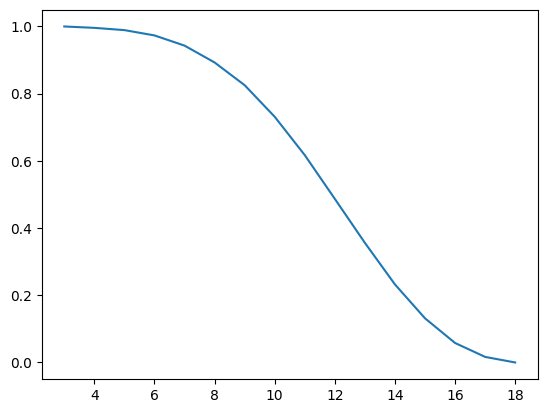

In [37]:
prob_gt.plot()

In [39]:
# to get the probability that you are greater than a value after sampling 6 times
prob_gt6 = prob_gt**6

<Axes: >

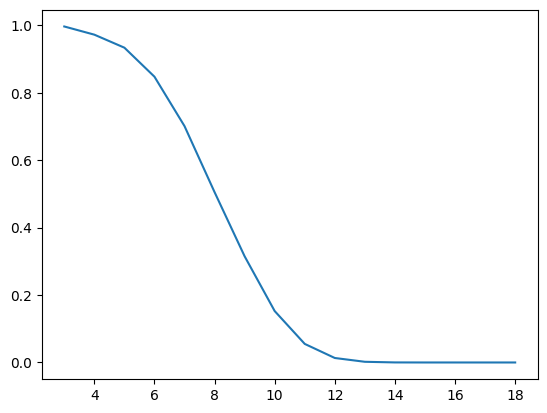

In [40]:
prob_gt6.plot()

In [41]:
# prob_gt6(x) means the probability that ALL 6 values exceeded x. We are interested in the worst exceeding x
# therefore we do 1-prob_gt6
prob_le6 = 1-prob_gt6


In [42]:
cdf_min6 = Cdf(prob_le6)

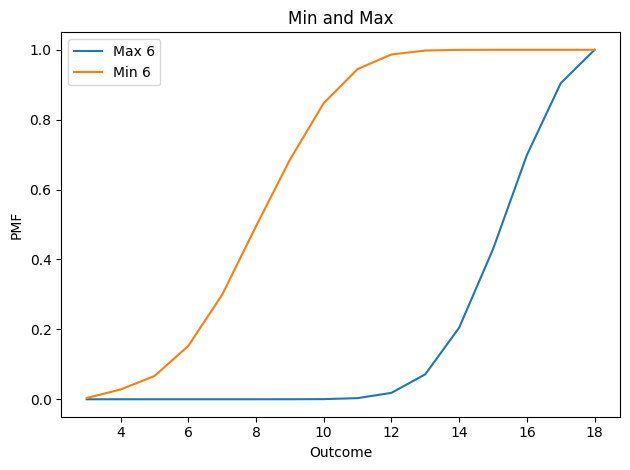

In [46]:
cdf_max6.plot(label='Max 6')
cdf_min6.plot(label='Min 6')
decorate_dice('Min and Max')

7.5. Mixture

In [47]:
d4 = make_die(4)
d6 = make_die(6)

In [48]:
prob_1 = (d4(1) + d6(1))/2
prob_1

np.float64(0.20833333333333331)

In [ ]:
prob_6 = (d4(6) + d6(6))/2 #this is different because 4 sided dice doesnt have 6
prob_6

np.float64(0.08333333333333333)

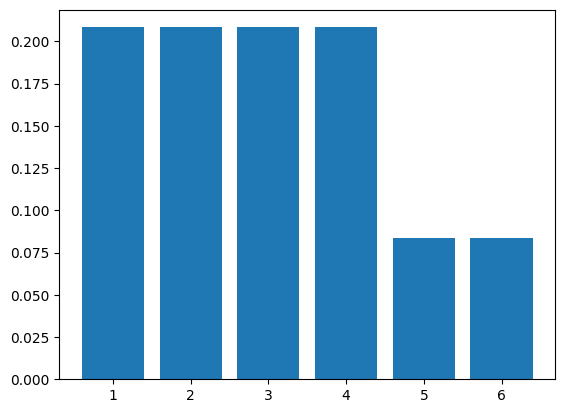

In [53]:
mix1 = (d4+d6)/2
mix1.bar()

In [54]:
'''
An important take away here is the use of + vs add_dist
+ is because we are only pulling from one dist -> 50% chance of choosing a d4 vs d6 then rolling it
add_dist is because we are combining distribution -> roll both dice
'''

'\nAn important take away here is the use of + vs add_dist\n+ is because we are only pulling from one dist -> 50% chance of choosing a d4 vs d6 then rolling it\nadd_dist is because we are combining distribution -> roll both dice\n'

7.6. General Mixtures

In [56]:
hypos = [4, 6, 8]
counts = [1, 2, 3]

pmf_dice = Pmf(counts, hypos)
pmf_dice.normalize()
pmf_dice

,probs
4,0.166667
6,0.333333
8,0.500000


In [57]:
dice = [make_die(side) for side in hypos]

In [59]:
import pandas as pd

In [ ]:
# each row is a dice, each column is the probability of rolling that number
# 0,2 means a 4 sided die rolling a 2 -> 25%
pd.DataFrame(dice)

,1,2,3,4,5,6,7,8
0,0.250000,0.250000,0.250000,0.250000,NaN,NaN,NaN,NaN
1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,NaN,NaN
2,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125,0.125


In [63]:
df = pd.DataFrame(dice).fillna(0).transpose()
df

,0,1,2
1,0.25,0.166667,0.125
2,0.25,0.166667,0.125
3,0.25,0.166667,0.125
4,0.25,0.166667,0.125
5,0.00,0.166667,0.125
6,0.00,0.166667,0.125
7,0.00,0.000000,0.125
8,0.00,0.000000,0.125


In [ ]:
df *= pmf_dice # telling you the chance of selecting that dice

In [66]:
df

,0,1,2
1,0.041667,0.055556,0.0625
2,0.041667,0.055556,0.0625
3,0.041667,0.055556,0.0625
4,0.041667,0.055556,0.0625
5,0.000000,0.055556,0.0625
6,0.000000,0.055556,0.0625
7,0.000000,0.000000,0.0625
8,0.000000,0.000000,0.0625


In [67]:
df.sum(axis=1)

1    0.159722
2    0.159722
3    0.159722
4    0.159722
5    0.118056
6    0.118056
7    0.062500
8    0.062500
dtype: float64

In [68]:
def make_mixture(pmf, pmf_seq):
    #pmf_seq is a sequence of pmf objects
    df = pd.DataFrame(pmf_seq).fillna(0).transpose()
    df *= np.array(pmf)
    total = df.sum(axis=1)
    return Pmf(total)

In [69]:
mix = make_mixture(pmf_dice, dice)

In [70]:
mix

,probs
1,0.159722
2,0.159722
3,0.159722
4,0.159722
5,0.118056
6,0.118056
7,0.062500
8,0.062500
